# 1083 Albumin Initial ML

### By: Ian Weimer

In [65]:
import imblearn
print("Imbalanced-Learn", imblearn.__version__)

Imbalanced-Learn 0.7.0


## Imports

In [66]:
import numpy as np
import pandas as pd
from matplotlib import pyplot
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import graphviz
import pydotplus
from imblearn.over_sampling import SMOTE, SMOTENC
pd.set_option('display.max_columns', None)

## Load Albumin Data From Pre-processing and Exploratory Analysis

In [67]:
df = pd.read_csv('C:/Users/Iweimer/Desktop/BB_Git/1083-albumin-data-exploration/ML/K72_Cohort/Tables/K72_HF_MATCHED_alb_24hrs.csv')

In [68]:
# drop insignificant vars

#df.drop(columns = ['bed_size', 'Cirrhosis', 'tenant'], inplace=True)

## Select Only Patients Who Lived (Removing Patients in 0 Class Who Died)

In [69]:
df = df.loc[df['90_day_mortality'] == 0]

In [70]:
df.shape

(3530, 20)

In [71]:
df.head()

personid                           encounterid  \
2  2b67cff8-4f3a-4aa0-8fa0-1d342b88e516  9fd9125a-e53c-47ef-ad19-8a72d171897f   
3  3d335201-ebbc-47ec-881e-5e9eb6d6c681  7e925b39-2be4-4bf1-91d2-1dc475764426   
5  8144725c-2621-4430-afdd-551011459bfc  29aa385b-0030-463e-ae6c-a27a246f9832   
6  857023fc-eceb-48b6-bd84-7a0371a75b47  469bbe56-570c-4b58-ac64-c8bbe051031f   
7  86e9894b-3c16-4fe6-ae11-009b3929c1b8  6f51b270-ff4c-4798-b0ca-5a77d3f868e2   

    age  sex  ICU  bl_albumin_value  hgb_bl  beta_blocker  Cirrhosis  CCI  \
2  76.0    0    1               1.8    10.0             0          0    5   
3  30.0    1    1               1.8    14.4             0          1    3   
5  66.0    0    0               1.5    14.6             0          0    0   
6  80.0    1    0               2.7    11.0             0          1    5   
7  56.0    1    0               2.9    11.5             0          1    4   

   qSOFA    MELD  SEWS  ACLF  albumin_24hrs  albumin   LOS_days  \
2      1  16.000     2     1              1        1  12.167361   
3      0  33.848     2     2              1        1   7.840972   
5      2  19.148     4     1              1        1   3.771528   
6      0  18.000     0     1              1        1   5.390972   
7      2  11.000     3     0              1        1  11.000000   

   90_day_mortality  90_day_readmission  hospital_free_days  
2                 0                 0.0                  33  
3                 0                 1.0                   7  
5                 0                 0.0                  86  
6                 0                 0.0                  39  
7                 0                 0.0                   3

In [72]:
df[df['albumin_24hrs'] == 1].LOS_days.describe()

count    1683.000000
mean       11.372707
std         9.516831
min         0.196528
25%         4.420486
50%         8.277778
75%        15.416319
max        49.184722
Name: LOS_days, dtype: float64

In [73]:
df[df['albumin_24hrs'] == 0].LOS_days.describe()

count    1847.000000
mean        8.706283
std         8.831938
min         0.000000
25%         2.544155
50%         5.859028
75%        12.048264
max        49.805556
Name: LOS_days, dtype: float64

In [74]:
df[df['albumin_24hrs'] == 1].hospital_free_days.describe()

count    1683.000000
mean       52.317291
std        31.316938
min         0.000000
25%        19.000000
50%        64.000000
75%        81.000000
max        90.000000
Name: hospital_free_days, dtype: float64

In [75]:
df[df['albumin_24hrs'] == 0].hospital_free_days.describe()

count    1847.000000
mean       56.112074
std        31.188952
min         0.000000
25%        26.000000
50%        70.000000
75%        84.000000
max        90.000000
Name: hospital_free_days, dtype: float64

In [76]:
df.drop(columns=['encounterid', 'personid', 'albumin'], inplace=True)

In [77]:
df.drop(columns=['90_day_mortality', '90_day_readmission', 'LOS_days'], inplace=True)

In [78]:
df.shape

(3530, 14)

In [79]:
df.describe()

age          sex          ICU  bl_albumin_value       hgb_bl  \
count  3530.000000  3530.000000  3530.000000       3530.000000  3530.000000   
mean     56.816997     0.587252     0.238810          2.253830    11.043654   
std      14.402207     0.492398     0.426417          0.452103     2.681684   
min      11.000000     0.000000     0.000000          0.800000     3.500000   
25%      48.000000     0.000000     0.000000          1.900000     9.200000   
50%      58.000000     1.000000     0.000000          2.300000    11.000000   
75%      67.000000     1.000000     0.000000          2.600000    12.800000   
max      89.000000     1.000000     1.000000          3.800000    19.900000   

       beta_blocker    Cirrhosis          CCI        qSOFA         MELD  \
count   3530.000000  3530.000000  3530.000000  3530.000000  3530.000000   
mean       0.296884     0.724646     4.487252     0.924363    24.310274   
std        0.456950     0.446756     2.700604     0.868974     8.218682   
min        0.000000     0.000000     0.000000     0.000000     6.000000   
25%        0.000000     0.000000     3.000000     0.000000    18.346000   
50%        0.000000     1.000000     4.000000     1.000000    24.452000   
75%        1.000000     1.000000     6.000000     1.000000    30.000000   
max        1.000000     1.000000    17.000000     3.000000    40.000000   

              SEWS         ACLF  albumin_24hrs  hospital_free_days  
count  3530.000000  3530.000000    3530.000000         3530.000000  
mean      1.809065     1.318697       0.476771           54.302833  
std       2.139993     1.008109       0.499531           31.303057  
min       0.000000     0.000000       0.000000            0.000000  
25%       0.000000     1.000000       0.000000           22.000000  
50%       1.000000     1.000000       0.000000           67.000000  
75%       3.000000     2.000000       1.000000           83.000000  
max      16.000000     5.000000       1.000000           90.000000

In [80]:
#df = df[['CCI', 'unknown_albumin_type', 'albumin_24hrs', '25_percent_albumin', 'LOS_days']]

In [81]:
#df['LOS_days'] = df['LOS_days']/24
#df.drop(columns=['LOS_days'], inplace=True)

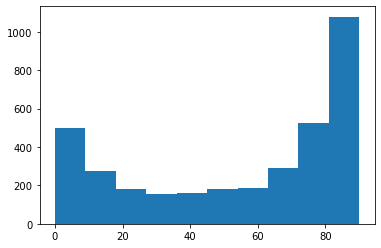

In [82]:
plt.hist(df['hospital_free_days']);

In [83]:
df['hospital_free_days'].describe()

count    3530.000000
mean       54.302833
std        31.303057
min         0.000000
25%        22.000000
50%        67.000000
75%        83.000000
max        90.000000
Name: hospital_free_days, dtype: float64

In [84]:
# Calculate Tertiles

q1 = df['hospital_free_days'].quantile(q=(1/3))
q2 = df['hospital_free_days'].quantile(q=(2/3))
print(q1)
print(q2)

39.0
79.0


In [85]:
# bin the LOS_days var

HFD = df['hospital_free_days']
m = max(HFD)

bins = [0, 39, 79, m]
labels=[0, 1, 2]

# 0 - Low HFD
# 1 - Medium HFD
# 2 - High/Long HFD

df['hospital_free_days'] = pd.cut(HFD, bins=bins, labels=labels, include_lowest=True)

In [86]:
df['hospital_free_days'].value_counts()

1    1195
0    1180
2    1155
Name: hospital_free_days, dtype: int64

## Modeling

In [87]:
# establish target feature, LOS_days, as y feature
y = df['hospital_free_days']
# drop target feature from features dataframe
X = df.drop(columns = ['hospital_free_days'], axis = 1)
# save dataframe column titles to list for reassigning after min max scale 
cols = X.columns

In [88]:
cols

Index(['age', 'sex', 'ICU', 'bl_albumin_value', 'hgb_bl', 'beta_blocker',
       'Cirrhosis', 'CCI', 'qSOFA', 'MELD', 'SEWS', 'ACLF', 'albumin_24hrs'],
      dtype='object')

## Standardize Data

In [89]:
#cols = X.columns

#instantiate min-max scaling object
#mm = MinMaxScaler()
# fit and transform feature dataframe
#X = pd.DataFrame(mm.fit_transform(X))
# reassign column names so new dataframe has corresponding names
#X.columns = cols

In [90]:
X.head()

age  sex  ICU  bl_albumin_value  hgb_bl  beta_blocker  Cirrhosis  CCI  \
2  76.0    0    1               1.8    10.0             0          0    5   
3  30.0    1    1               1.8    14.4             0          1    3   
5  66.0    0    0               1.5    14.6             0          0    0   
6  80.0    1    0               2.7    11.0             0          1    5   
7  56.0    1    0               2.9    11.5             0          1    4   

   qSOFA    MELD  SEWS  ACLF  albumin_24hrs  
2      1  16.000     2     1              1  
3      0  33.848     2     2              1  
5      2  19.148     4     1              1  
6      0  18.000     0     1              1  
7      2  11.000     3     0              1

In [91]:
X.shape

(3530, 13)

## Train Test Split

In [92]:
#sm = SMOTENC(random_state=42, categorical_features = [0, 1, 2, 3, 4, 5, \
#                                                     6, 7, 8, 9, 10])
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
#X_train, y_train = sm.fit_resample(X_train, y_train)

In [93]:
#sm = SMOTEN(random_state=42)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
#X_train, y_train = sm.fit_resample(X_train, y_train)

In [94]:
# train test split from target feature series and the predicting feature dataframe (set test size to 20% of data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 33)

In [95]:
y_train.value_counts()

1    990
0    922
2    912
Name: hospital_free_days, dtype: int64

## Multinomial Logistic Regression

In [96]:
# instantiate a Logistic Regression model without an intercept, 'liblinear' solver method
logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs')
# fit the model to X and y training sets
logreg.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(multi_class='multinomial')

Feature: age Score: -0.01029
Feature: sex Score: 0.00923
Feature: ICU Score: -0.24287
Feature: bl_albumin_value Score: 0.29767
Feature: hgb_bl Score: -0.00399
Feature: beta_blocker Score: 0.24782
Feature: Cirrhosis Score: 0.04393
Feature: CCI Score: 0.01761
Feature: qSOFA Score: -0.14531
Feature: MELD Score: -0.01251
Feature: SEWS Score: 0.00230
Feature: ACLF Score: -0.02216
Feature: albumin_24hrs Score: 0.20709


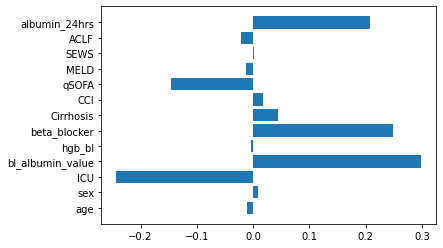

In [97]:
# general quick feature importance
# get coefficients for importance
# coefficients represent the log odds that an observation is in the
# target class, given the values of its X variables

importance = logreg.coef_[0]
# summarize feature importance
labels = []
for i,v in enumerate(importance):
    print('Feature: %s Score: %.5f' % (cols[i], v))
    labels.append(cols[i])
# plot feature importance
pyplot.barh(labels, importance)
pyplot.show()

                  Importance
bl_albumin_value    1.346720
beta_blocker        1.281232
albumin_24hrs       1.230097
Cirrhosis           1.044909
CCI                 1.017764
sex                 1.009271
SEWS                1.002307
hgb_bl              0.996022
age                 0.989761
MELD                0.987565
ACLF                0.978086
qSOFA               0.864750
ICU                 0.784371


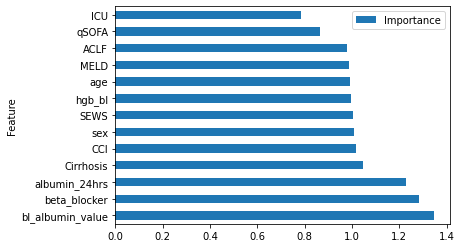

In [98]:
# convert log odds into regular odds with exponentiation
# np.exp()
# and list values, visualize in bar plot

odds = np.exp(logreg.coef_[0])
feature_importance = \
            pd.DataFrame(odds, 
             X.columns, 
             columns=['Importance'])\
            .sort_values(by='Importance', ascending=False)
        
ax = feature_importance.plot.barh(xlabel='Feature', ylabel='Importance')
print(feature_importance)
plt.show()

In [99]:
# Generate model prediction data for train and test sets
y_hat_train = logreg.predict(X_train)
y_hat_test = logreg.predict(X_test)

In [100]:
# confusion_matrix for actual y_train and predicted y_train
cnf_matrix = confusion_matrix(y_train, y_hat_train)
print('Confusion Matrix: \n', cnf_matrix)

Confusion Matrix: 
 [[414 272 236]
 [273 425 292]
 [255 294 363]]


In [101]:
# model metrics for training set (Precision, Recall, Accuracy, F1)
print(classification_report(y_train, y_hat_train))

              precision    recall  f1-score   support

           0       0.44      0.45      0.44       922
           1       0.43      0.43      0.43       990
           2       0.41      0.40      0.40       912

    accuracy                           0.43      2824
   macro avg       0.43      0.43      0.43      2824
weighted avg       0.43      0.43      0.43      2824



In [102]:
# confusion_matrix for actual y_test and predicted y_test
cnf_matrix = confusion_matrix(y_test, y_hat_test)
print('Confusion Matrix: \n', cnf_matrix)

Confusion Matrix: 
 [[116  77  65]
 [ 73  74  58]
 [ 68  77  98]]


In [103]:
# model metrics for test set (Precision, Recall, Accuracy, F1)
print(classification_report(y_test, y_hat_test))

              precision    recall  f1-score   support

           0       0.45      0.45      0.45       258
           1       0.32      0.36      0.34       205
           2       0.44      0.40      0.42       243

    accuracy                           0.41       706
   macro avg       0.41      0.40      0.40       706
weighted avg       0.41      0.41      0.41       706



## 1: Decision Tree 

In [104]:
# instantiate a decision tree model
# max_depth limits depth of tree, helps prevent overfitting training data
# max_depth 5
dt = tree.DecisionTreeClassifier(max_depth=7, min_samples_leaf=100)
# fit the model to X and y training sets
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7, min_samples_leaf=100)

Feature: age Score: 0.28799
Feature: sex Score: 0.02601
Feature: ICU Score: 0.13281
Feature: bl_albumin_value Score: 0.04716
Feature: hgb_bl Score: 0.02747
Feature: beta_blocker Score: 0.06102
Feature: Cirrhosis Score: 0.04363
Feature: CCI Score: 0.02131
Feature: qSOFA Score: 0.05466
Feature: MELD Score: 0.23474
Feature: SEWS Score: 0.00000
Feature: ACLF Score: 0.00000
Feature: albumin_24hrs Score: 0.06321


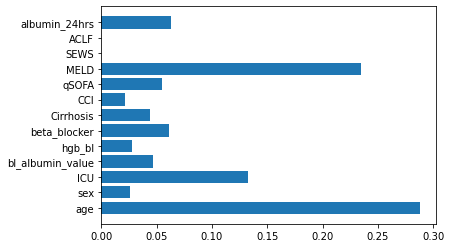

In [105]:
# get importance from decision tree model
importance = dt.feature_importances_
# summarize feature importance
labels = []
for i,v in enumerate(importance):
    print('Feature: %s Score: %.5f' % (cols[i], v))
    labels.append(cols[i])
# plot feature importance
pyplot.barh(labels, importance)
pyplot.show()

In [106]:
# generate model prediction data for train and test sets
y_hat_train = dt.predict(X_train)
y_hat_test = dt.predict(X_test)

In [107]:
# confusion_matrix for actual y_train and predicted y_train
cnf_matrix = confusion_matrix(y_train, y_hat_train)
print('Confusion Matrix: \n', cnf_matrix)

Confusion Matrix: 
 [[405 318 199]
 [233 457 300]
 [239 271 402]]


In [108]:
# model metrics for train set (Precision, Recall, Accuracy, F1)
print(classification_report(y_train, y_hat_train))

              precision    recall  f1-score   support

           0       0.46      0.44      0.45       922
           1       0.44      0.46      0.45       990
           2       0.45      0.44      0.44       912

    accuracy                           0.45      2824
   macro avg       0.45      0.45      0.45      2824
weighted avg       0.45      0.45      0.45      2824



In [109]:
# confusion_matrix for actual y_test and predicted y_test
cnf_matrix = confusion_matrix(y_test, y_hat_test)
print('Confusion Matrix: \n', cnf_matrix)

Confusion Matrix: 
 [[ 97  86  75]
 [ 62  83  60]
 [ 60  82 101]]


In [110]:
# model metrics for test set (Precision, Recall, Accuracy, F1)
print(classification_report(y_test, y_hat_test))

              precision    recall  f1-score   support

           0       0.44      0.38      0.41       258
           1       0.33      0.40      0.36       205
           2       0.43      0.42      0.42       243

    accuracy                           0.40       706
   macro avg       0.40      0.40      0.40       706
weighted avg       0.41      0.40      0.40       706



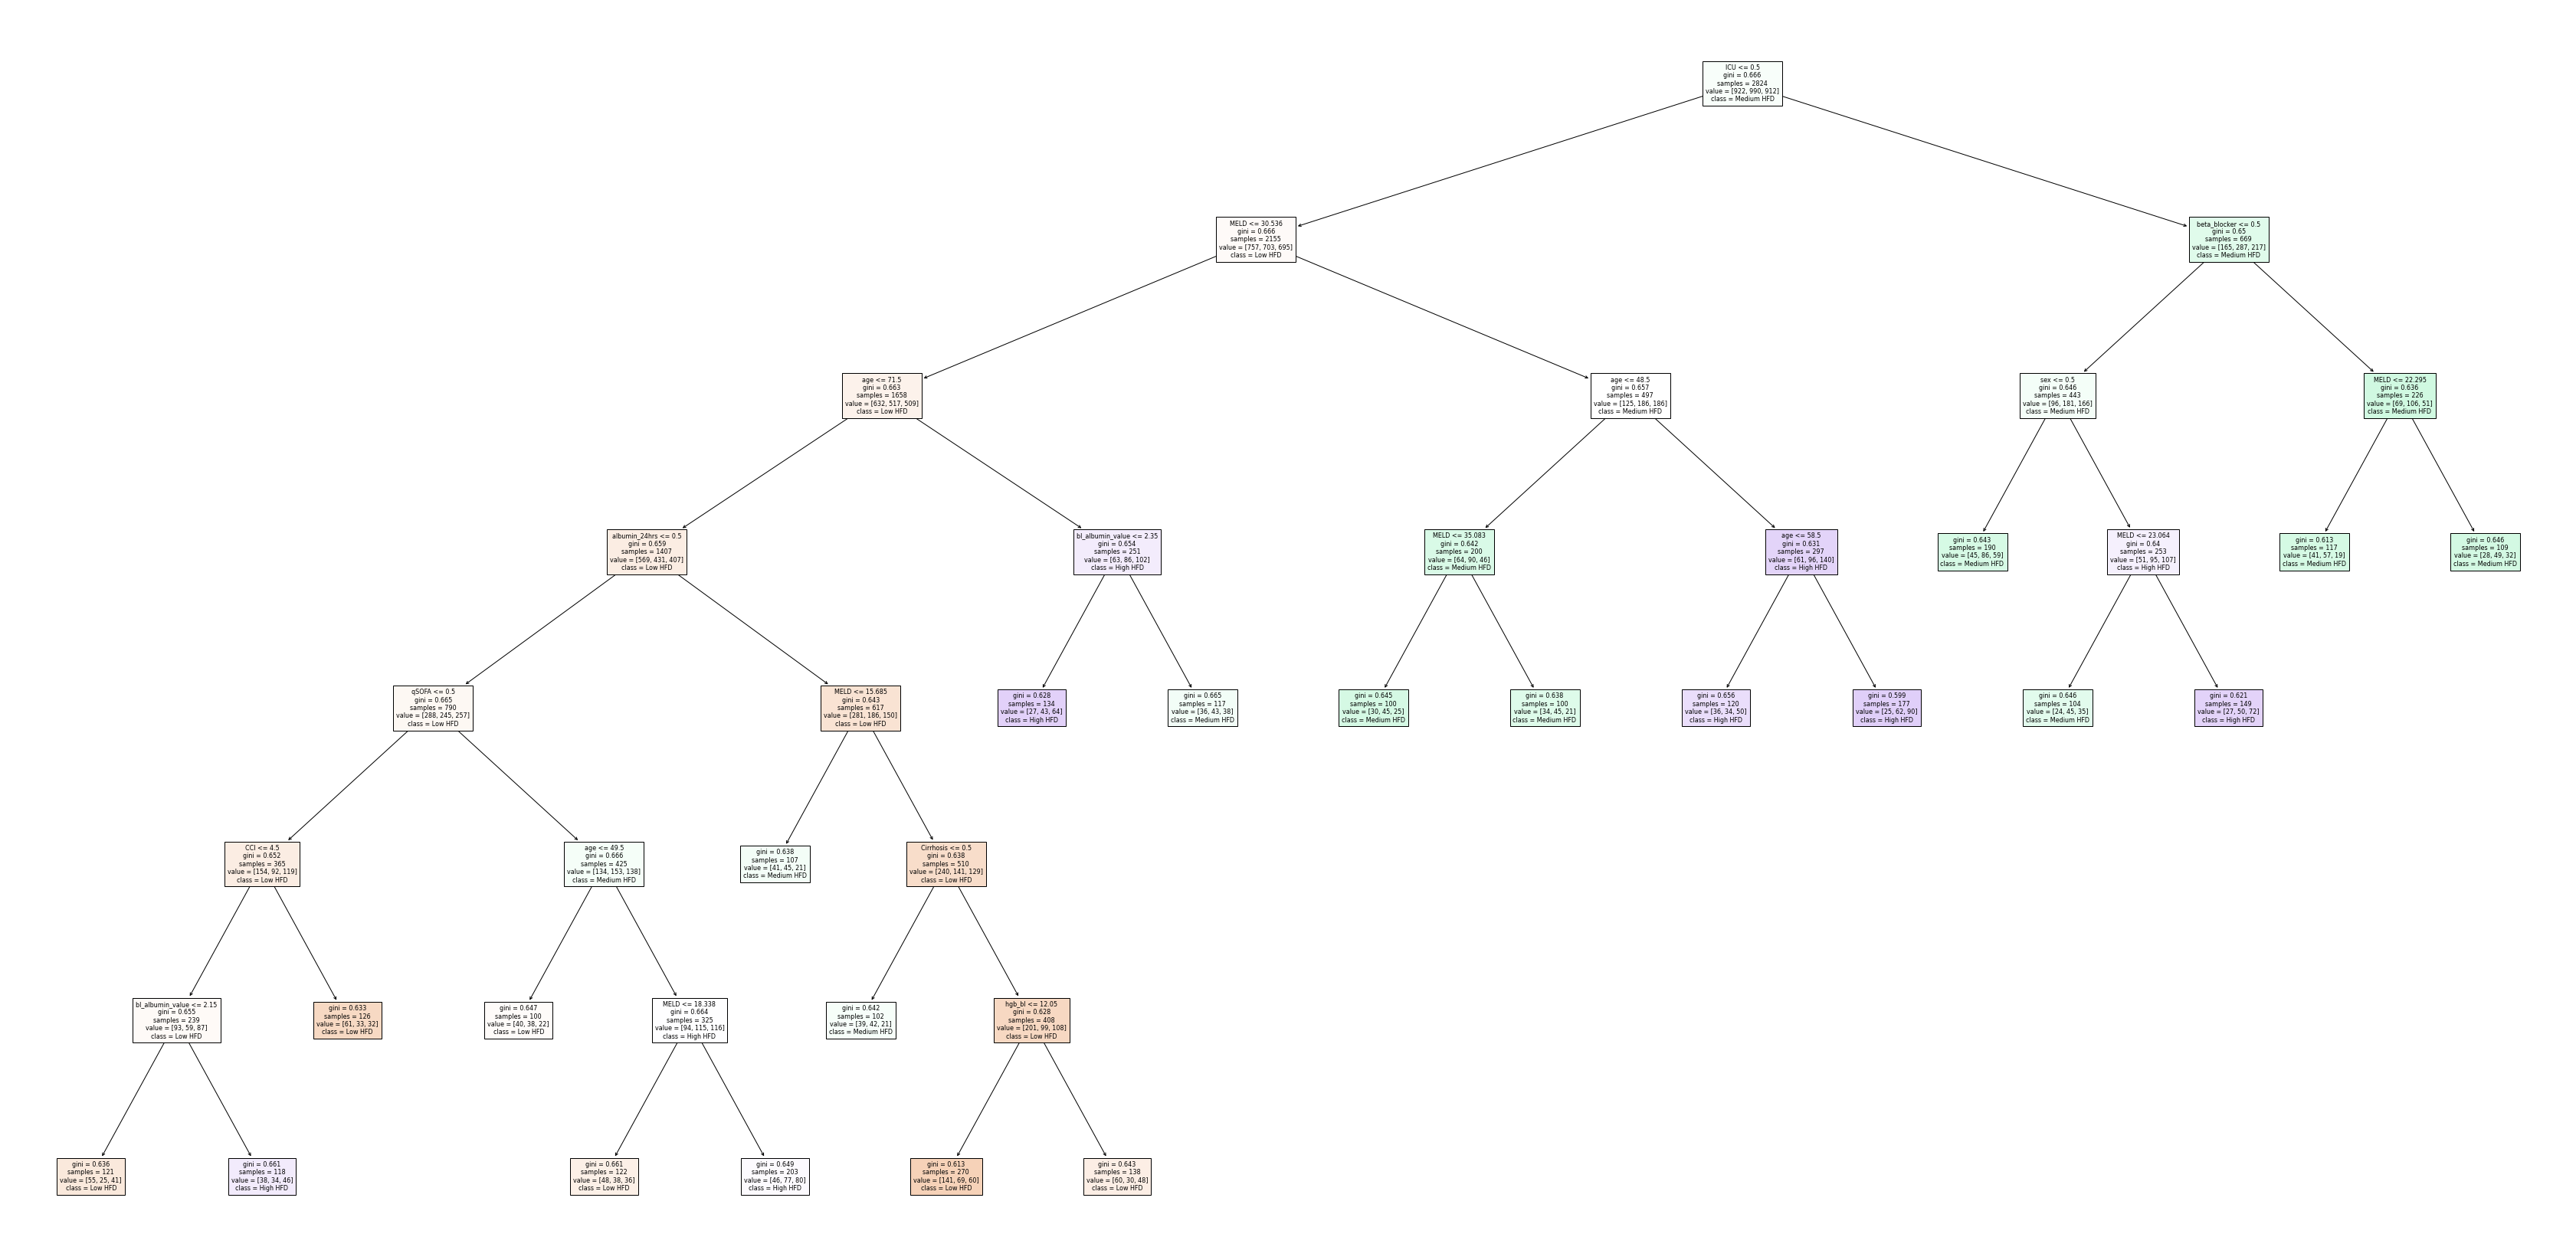

In [111]:
feature_names = X_train.columns.tolist()
class_names = ['Low HFD', 'Medium HFD', 'High HFD']

fig = plt.figure(figsize=(60,30))
_ = tree.plot_tree(dt,
                   fontsize=8,
                   feature_names=feature_names,  
                   class_names=class_names,
                   filled=True)

In [112]:
dot_data = tree.export_graphviz(dt, out_file=None, 
                     feature_names=feature_names,  
                     class_names=class_names,  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)
pydot_graph = pydotplus.graph_from_dot_data(dot_data)
pydot_graph.write_png('HFD_DT_D7_PSM_MATCHED.png')

True

## Random Forest

In [53]:
rf = RandomForestClassifier(max_depth=8, min_samples_leaf=100)
# fit the model to X and y training sets
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, min_samples_leaf=100)

In [54]:
# generate model prediction data for train and test sets
y_hat_train = rf.predict(X_train)
y_hat_test = rf.predict(X_test)

In [55]:
# confusion_matrix for actual y_train and predicted y_train
cnf_matrix = confusion_matrix(y_train, y_hat_train)
print('Confusion Matrix: \n', cnf_matrix)

Confusion Matrix: 
 [[ 42478   6691  29106]
 [ 27499   9425  54026]
 [ 19704   6073 109965]]


In [56]:
# model metrics for train set (Precision, Recall, Accuracy, F1)
print(classification_report(y_train, y_hat_train))

              precision    recall  f1-score   support

           0       0.47      0.54      0.51     78275
           1       0.42      0.10      0.17     90950
           2       0.57      0.81      0.67    135742

    accuracy                           0.53    304967
   macro avg       0.49      0.49      0.45    304967
weighted avg       0.50      0.53      0.48    304967



In [57]:
# confusion_matrix for actual y_test and predicted y_test
cnf_matrix = confusion_matrix(y_test, y_hat_test)
print('Confusion Matrix: \n', cnf_matrix)

Confusion Matrix: 
 [[10737  1690  7277]
 [ 6864  2400 13411]
 [ 4863  1550 27450]]


In [58]:
# model metrics for test set (Precision, Recall, Accuracy, F1)
print(classification_report(y_test, y_hat_test))

              precision    recall  f1-score   support

           0       0.48      0.54      0.51     19704
           1       0.43      0.11      0.17     22675
           2       0.57      0.81      0.67     33863

    accuracy                           0.53     76242
   macro avg       0.49      0.49      0.45     76242
weighted avg       0.50      0.53      0.48     76242



Feature: albumin_24hrs Score: 0.68268
Feature: ICU Score: 0.09195
Feature: CCI Score: 0.04476
Feature: qSOFA Score: 0.05184
Feature: beta_blocker Score: 0.05392
Feature: Cirrhosis_score Score: 0.02860
Feature: nutritional_anemia Score: 0.00242
Feature: SEWS Score: 0.04383


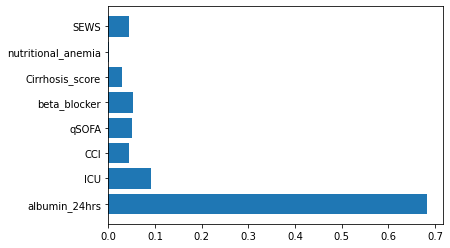

In [59]:
# get importance from decision tree model
importance = rf.feature_importances_
# summarize feature importance
labels = []
for i,v in enumerate(importance):
    print('Feature: %s Score: %.5f' % (cols[i], v))
    labels.append(cols[i])
# plot feature importance
pyplot.barh(labels, importance)
pyplot.show()